<a href="https://colab.research.google.com/github/AbrarMahmud/EEE_447/blob/main/src/masking_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Import
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# List of image URLs on GitHub
image_urls = [
    #"https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/ref.jpg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_1.jpeg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_2.jpeg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_3.jpeg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_4.jpeg"
]

# Folder where you want to save the images in Colab
#local_folder = "/content/images/"
local_folder = os.getcwd()

# Create the folder if it doesn't exist
os.makedirs(local_folder, exist_ok=True)

## For reference image.....................................................................
local_path = os.path.join(local_folder, f"ref.jpg")
    # Use wget to download the image
ref_url ="https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/Inkedref_1_LI.jpg"
!wget $ref_url -O $local_path
    # Check if the download was successful
if os.path.isfile(local_path):
   print(f"ref_img successfully saved to {local_path}")
else:
   print(f"Failed to retrieve ref_img.")


# Loop through for test image..............................................................
for i, image_url in enumerate(image_urls, 1):
    # Construct the local path for each image
    local_path = os.path.join(local_folder, f"img_{i}.jpeg")

    # Use wget to download the image
    !wget $image_url -O $local_path

    # Check if the download was successful
    if os.path.isfile(local_path):
        print(f"Image {i} successfully saved to {local_path}")
    else:
        print(f"Failed to retrieve image {i}.")

# List the files in the local folder
!ls $local_folder


--2023-12-29 08:53:37--  https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/Inkedref_1_LI.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1057927 (1.0M) [image/jpeg]
Saving to: ‘/content/ref.jpg’

/content/ref.jpg    100%[===================>]   1.01M  --.-KB/s    in 0.04s   

2023-12-29 08:53:37 (28.4 MB/s) - ‘/content/ref.jpg’ saved [1057927/1057927]

ref_img successfully saved to /content/ref.jpg
--2023-12-29 08:53:37--  https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awai

Reading reference image: ref.jpg
Reading image to align: img_1.jpeg


Text(0.5, 1.0, 'scanned_masked')

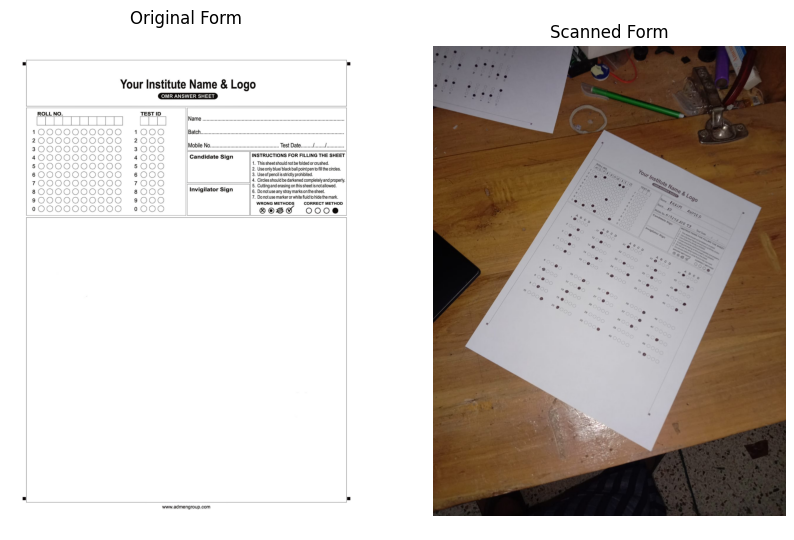

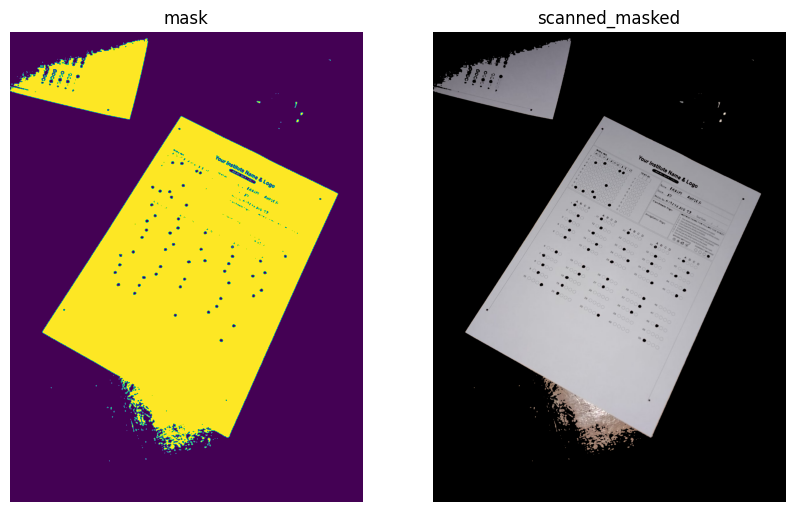

In [3]:
# Read reference image
refFilename = "ref.jpg"
print("Reading reference image:", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned##################TEST_IMAGE#########################
imFilename = "img_1.jpeg"
print("Reading image to align:", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) #This function is used only to convert BGR--->RGB
## Image Enhancement##########################################################
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(im2_gray,(3,3),0)
ret3,msk = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



#im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
#im2 = cv2.adaptiveThreshold(im2_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,7)
im2_msk = cv2.bitwise_and(im2,im2, mask= msk)

# Display Images

plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(msk); plt.title("mask")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_msk); plt.title("scanned_masked")


Text(0.5, 1.0, 'im2_masked')

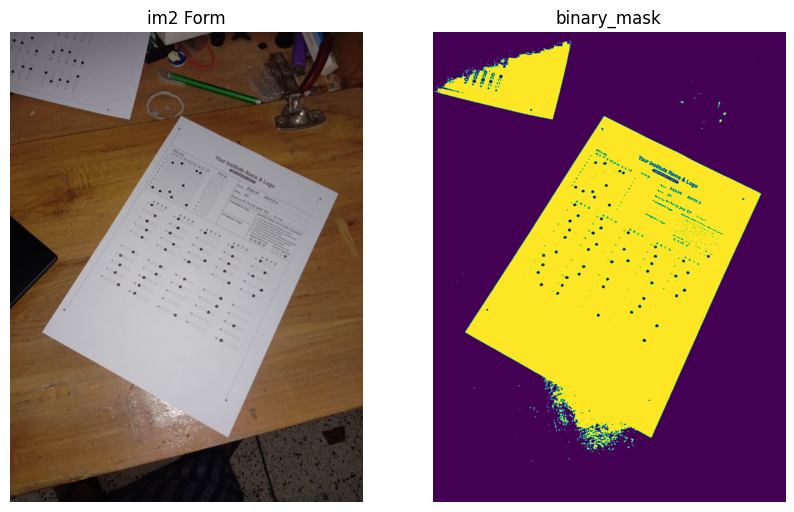

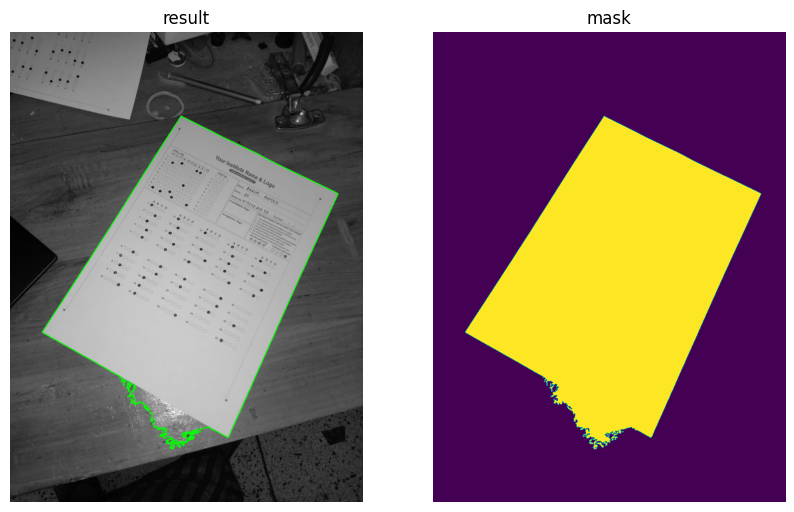

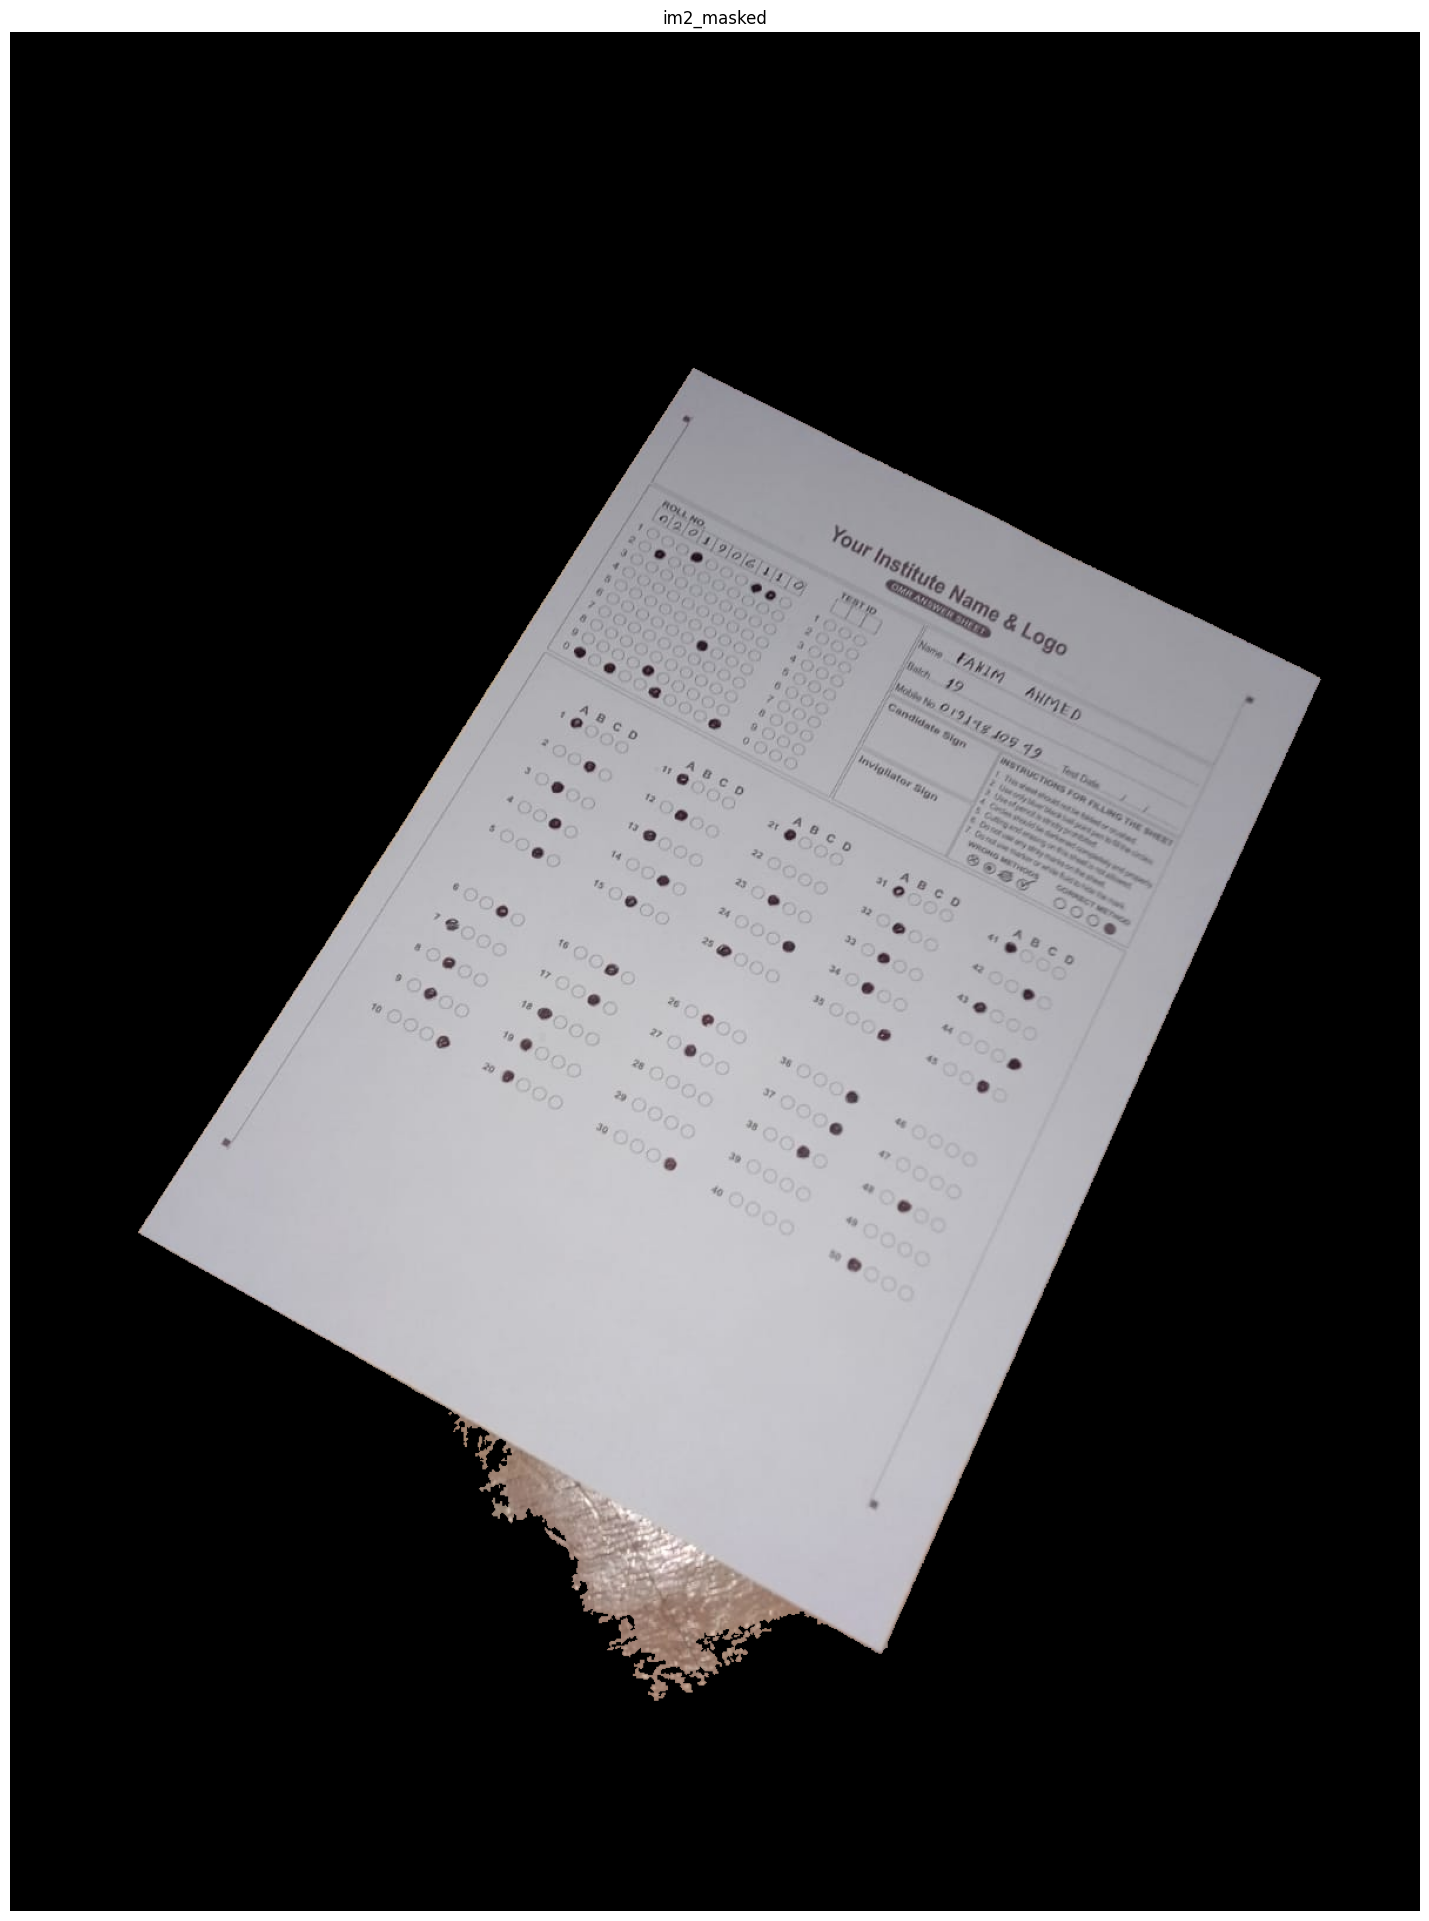

In [10]:

def find_largest_blob(image, lower_bound, upper_bound):
    # Threshold the grayscale image
    _, binary_image = cv2.threshold(image, lower_bound, upper_bound, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour
    largest_contour = max(contours, key=cv2.contourArea, default=None)

    return binary_image, largest_contour

# Capture image (replace '0' with the camera index or provide the image path)
#cap = cv2.VideoCapture(0)
#ret, frame = cap.read()

# Convert the frame to grayscale
#gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Define intensity range for detection (adjust based on the intensity of the blob you want to detect)
lower_bound = 120  # Example: lower bound for blob intensity
upper_bound = 255  # Example: upper bound for blob intensity

# Find the largest blob
binary_mask, largest_contour = find_largest_blob(im2_gray, lower_bound, upper_bound)

# Draw result on the original image
result = cv2.cvtColor(im2_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, [largest_contour], 0, (0, 255, 0), 2)
# Display the results
# Display Images

mask = np.zeros_like(binary_mask)
cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)


plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im2); plt.title("im2 Form")
plt.subplot(122); plt.axis('off'); plt.imshow(binary_mask); plt.title("binary_mask")

plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(result); plt.title("result")
plt.subplot(122); plt.axis('off'); plt.imshow(mask); plt.title("mask")

im2_masked = cv2.bitwise_and(im2,im2, mask= mask)
plt.figure(figsize=[40, 40]);
plt.subplot(121); plt.axis('off'); plt.imshow(im2_masked); plt.title("im2_masked")
#plt.subplot(122); plt.axis('off'); plt.imshow(mask); plt.title("mask")
#cv2.imshow('Original Image', frame)
#cv2.imshow('Mask', mask)
#cv2.imshow('Detected Blob', result)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [4]:

def find_largest_blob(image, lower_bound, upper_bound):
    # Threshold the grayscale image
    _, binary_image = cv2.threshold(image, lower_bound, upper_bound, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour
    largest_contour = max(contours, key=cv2.contourArea, default=None)

    # Create binary mask using the largest contour
    mask = np.zeros_like(binary_image)
    cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

    return binary_image, mask

# Capture image (replace '0' with the camera index or provide the image path)
#cap = cv2.VideoCapture(0)
#ret, frame = cap.read()

# Convert the frame to grayscale
#gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Define intensity range for detection (adjust based on the intensity of the blob you want to detect)
lower_bound = 150  # Example: lower bound for blob intensity
upper_bound = 255  # Example: upper bound for blob intensity

# Find the largest blob and create a binary mask
binary_mask, blob_mask = find_largest_blob(im2_gray, lower_bound, upper_bound)

# Draw result on the original image
result = cv2.cvtColor(im2_gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, [blob_mask], 0, (0, 255, 0), 2)


plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im2); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(binary_mask); plt.title("Scanned Form")

plt.figure(figsize=[10, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(result); plt.title("mask")
plt.subplot(122); plt.axis('off'); plt.imshow(blob_mask); plt.title("scanned_masked")



# Display the results
#cv2.imshow('Original Image', frame)
#cv2.imshow('Binary Mask', binary_mask)
#cv2.imshow('Detected Blob Mask', blob_mask)
#cv2.imshow('Detected Blob', result)

#cv2.waitKey(0)
#cv2.destroyAllWindows()


error: ignored

In [9]:
import cv2
import numpy as np

# Capture image (replace '0' with the camera index or provide the image path)

# Preprocess image
#gray = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(msk, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Approximate contours
approx_contours = [cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) for cnt in contours]

# Detect quadrilateral (assumption: document is the largest quadrilateral)
largest_quadrilateral = max(approx_contours, key=cv2.contourArea)

# Perspective transform
pts1 = np.float32(largest_quadrilateral)
pts2 = np.float32([[0, 0], [1600, 0], [1600, 1200], [0, 1200]])  # Adjust the size as needed
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(im2, matrix, (1600, 1200))  # Adjust the size as needed

# Mask background
mask = np.zeros_like(result)
cv2.fillPoly(mask, [largest_quadrilateral], (255, 255, 255))
result_masked = cv2.bitwise_and(result, mask)

# Display the results


plt.figure(figsize=[40, 20]);
plt.subplot(311); plt.axis('off'); plt.imshow(msk); plt.title("Original Form")
plt.subplot(312); plt.axis('off'); plt.imshow(result); plt.title("Scanned Form")
plt.subplot(313); plt.axis('off'); plt.imshow(result_masked); plt.title("Scanned Form")

error: ignored